# Fashion MNIST - Convolution Neural Network

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리

In [3]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_class_train), (X_test, Y_class_test) = fashion_mnist.load_data()

In [4]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
# 정규화
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### 모델 정의/설정/학습

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

In [8]:
model = Sequential([
                    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), padding='same', activation='relu'),
                    Conv2D(64, (4, 4), padding='same', activation='relu'),
                    Conv2D(128, (5, 5), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=2),
                    Dropout(0.25),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dropout(0.5),
                    Dense(128, activation='relu'),
                    Dropout(0.5),
                    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        32832     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       204928    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
modelpath = MODEL_DIR + 'best{epoch:03d}-{val_loss:.4f}.hdf5'

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

In [12]:
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=100, batch_size=200, verbose=0, callbacks=[checkpointer, early_stopping])


Epoch 00001: val_loss improved from inf to 0.29648, saving model to ./model/best001-0.2965.hdf5

Epoch 00002: val_loss improved from 0.29648 to 0.24085, saving model to ./model/best002-0.2408.hdf5

Epoch 00003: val_loss improved from 0.24085 to 0.22280, saving model to ./model/best003-0.2228.hdf5

Epoch 00004: val_loss improved from 0.22280 to 0.20906, saving model to ./model/best004-0.2091.hdf5

Epoch 00005: val_loss improved from 0.20906 to 0.20280, saving model to ./model/best005-0.2028.hdf5

Epoch 00006: val_loss improved from 0.20280 to 0.19561, saving model to ./model/best006-0.1956.hdf5

Epoch 00007: val_loss improved from 0.19561 to 0.19156, saving model to ./model/best007-0.1916.hdf5

Epoch 00008: val_loss did not improve from 0.19156

Epoch 00009: val_loss did not improve from 0.19156

Epoch 00010: val_loss did not improve from 0.19156

Epoch 00011: val_loss did not improve from 0.19156

Epoch 00012: val_loss did not improve from 0.19156

Epoch 00013: val_loss did not improv

In [16]:
from tensorflow.keras.models import load_model
best_model = load_model('./model/best007-0.1916.hdf5')

In [17]:
acc = best_model.evaluate(X_test, Y_test, verbose=2)[1]
print(f'\n Test Accuracy: {acc:.4f}')

313/313 - 2s - loss: 0.2099 - accuracy: 0.9285

 Test Accuracy: 0.9285


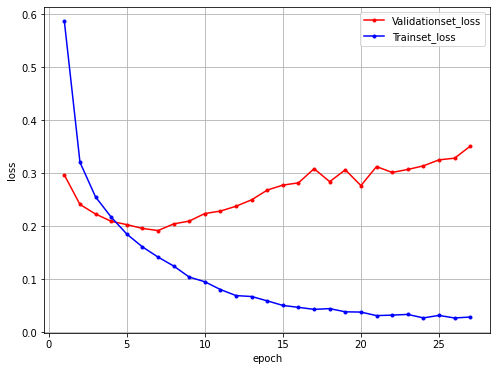

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validationset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()